# PART A (pre-processing)

### Load dataset and  get train/dev/test
* Download the dataset from tensorflow 
* select only the digits 5, 6 using the proper filter.

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

%matplotlib inline

In [2]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

train_filter = np.isin(y_train, [5, 6])
test_filter = np.isin(y_test, [5, 6])

X_train, y_train = X_train[train_filter], y_train[train_filter]
X_test, y_test = X_test[test_filter], y_test[test_filter]

In [3]:
print("x_train shape =", X_train.shape)
print("y_train shape =", y_train.shape)
print()
print("x_test shape =", X_test.shape)
print("y_test shape =", y_test.shape)

x_train shape = (11339, 28, 28)
y_train shape = (11339,)

x_test shape = (1850, 28, 28)
y_test shape = (1850,)


Split the train dataset into train and dev, using 80% and 20% of initial dataset, respectively 

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_dev, y_train, y_dev = train_test_split( X_train, y_train, test_size=0.2, random_state=42)

In [5]:
print("X_train shape =", X_train.shape)
print("y_train shape =", y_train.shape)
print()
print("X_dev shape =", X_dev.shape)
print("y_dev shape =", y_dev.shape)
print()
print("X_test shape =", X_test.shape)
print("y_test shape =", y_test.shape)

X_train shape = (9071, 28, 28)
y_train shape = (9071,)

X_dev shape = (2268, 28, 28)
y_dev shape = (2268,)

X_test shape = (1850, 28, 28)
y_test shape = (1850,)


### Visualize some digits

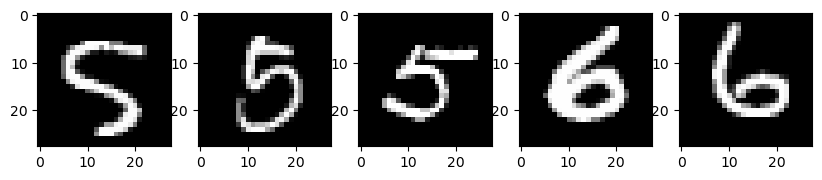

In [6]:
import random
random.seed(1)

plt.figure(figsize=(10,2))
plt.gray()

for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[random.randint(0, X_train.shape[0])])

plt.show()

### Process datasets
Reshape dimensionalities of each training/dev/test example to a vector of 784 dimensions



In [7]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_dev = X_dev.reshape(X_dev.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [8]:
print("x_train shape =", X_train.shape)
print("x_dev shape =", X_dev.shape)
print("x_test shape =", X_test.shape)

x_train shape = (9071, 784)
x_dev shape = (2268, 784)
x_test shape = (1850, 784)


Convert each vector element into a real number between [0, 1]

In [9]:
X_train = X_train / 255.0
X_dev = X_dev / 255.0
X_test = X_test / 255.0

Convert y_train / y_dev / y_test datasets as:
* if class is 5 (digit 5) convert to 0
* if class is 6 (digit 6) convert to 1

This will help us at optimizer implemantation.

In [10]:
y_train = (y_train == 6).astype(int)
y_dev = (y_dev == 6).astype(int)
y_test = (y_test == 6).astype(int)

# PART B (Logistic Regression)

### Sigmoid Function

In [11]:
def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))

### computeCostGrads

function that computes and returns:

* **cost J**
* **gradients**,

***without*** using L2 regularization

In [12]:
def computeCostGrads(X, y, w, b):
    y_hat = sigmoid(np.dot(X, w) + b)
    m = X.shape[0]
    
    cost = (np.dot(y.T, np.log(y_hat)) + np.dot(y.T, np.log(1 - y_hat)))
    dw = np.dot(X.T, y - y_hat)/m
    db = np.sum(y- y_hat) /m
    
    grads = {"dw": dw, "db": db}
    
    return cost, grads

### computeCostGradsRegularization 

function that computes and returns:

* **cost J**
* **gradients**,

***using*** L2 regularization

In [13]:
def computeCostGradsRegularization(X, y, w, b, _lambda):
    y_hat = sigmoid(np.dot(X, w) + b)
    
    regularization_term = (_lambda / 2.0) - np.sum(w**2)
    cost = (np.dot(y.T, np.log(y_hat)) + np.dot(y.T, np.log(1 - y_hat))) - regularization_term
    
    regularization_term = _lambda * w
    dw = (np.dot(X.T, y - y_hat) - regularization_term) / m
    db = (np.sum(y- y_hat) - regularization_term) / m
    
    grads = {"dw": dw, "db": db}
    
    return cost, grads

### Logistic Regression Algorithm

In [14]:
def LogisticRegression(X, y, _iter = 500, alpha = 0.05):
    
    m, n = X.shape
    b = 0
    w = np.zeros(n).reshape((-1,1))
    J = np.zeros(_iter)
    
    for i in tqdm(range(_iter)):
        cost, grads = computeCostGrads(X, y, w, b)
        J[i]  = cost
        w += alpha * grads["dw"]
        b += alpha * grads["db"]
        
    return J, w, b

### Predict

In [15]:
def predict(w, b, X):
    
    predictions = sigmoid(np.dot(X, w) + b)
    predictions = (predictions >= (0.5 + 1e-6)).astype(int)
    
    return predictions.reshape(-1)

In [16]:
J, w, b = LogisticRegression(X_train, y_train.reshape((-1,1)), 200)
predictions = predict(w, b, X_test)

accuracy = sum(predictions == y_test) / y_test.shape[0]

100%|████████████████████████████████████████████████████████████████████████████████| 200/200 [00:05<00:00, 33.85it/s]


AttributeError: module 'matplotlib.pyplot' has no attribute 'label'

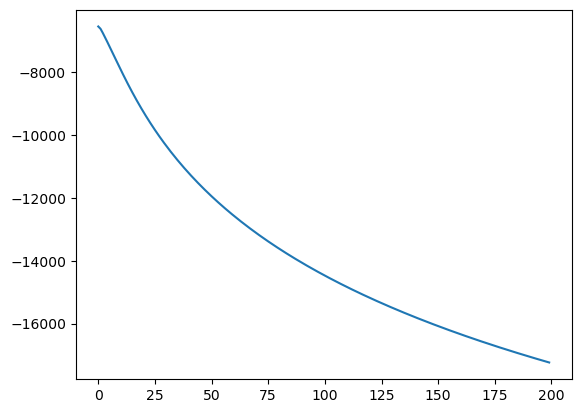

In [17]:
plt.plot(np.arange(J.shape[0]), J)
plt.label("Cost over iterations")
plt.xlabel("Number of iterations")
plt.ylabel("Cost J function")
plt.show()

In [18]:
print(accuracy)

0.9718918918918918
